In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib
import matplotlib.font_manager as fm

font_path = 'C:\\Windows\\Fonts\\HANYGO230.ttf' # 윈도우 OS 폰트 경로
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name() # 폰트명
matplotlib.rc('font', family=font_name)
# matplotlib이 기본적으로 사용하는 유니코드 마이너스 비활성화
# -> 아스키코드의 마이너스 사용
plt.rc('axes', unicode_minus=False)

In [3]:
df = pd.read_csv("data/heart_2022_with_nans.csv")

df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [17]:
print(df.shape)
print(df.columns)

df.info()

(445132, 40)
Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
--- 

In [7]:
df.describe(include='object')

,State,Sex,GeneralHealth,LastCheckupTime,PhysicalActivities,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,...,ChestScan,RaceEthnicityCategory,AgeCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
count,445132,445132,443934,436824,444039,433772,442067,440727,443575,443359,...,389086,431075,436053,398558,379005,398011,368092,362616,394509,394368
unique,54,2,5,4,2,4,2,2,2,2,...,2,5,13,2,2,2,2,4,2,3
top,Washington,Female,Very good,Within past year (anytime less than 12 months ...,Yes,None of them,No,No,No,No,...,No,"White only, Non-Hispanic",Age 65 to 69,Yes,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
freq,26152,235893,148444,350944,337559,233455,416959,414176,424336,376665,...,223221,320421,47099,210891,249919,209256,215604,121493,377324,270055


In [4]:
df = df.drop(['RemovedTeeth', 'DeafOrHardOfHearing', 'HadSkinCancer', 'LastCheckupTime',  'HadKidneyDisease', 'DifficultyWalking', 'HadArthritis', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'ChestScan', 'FluVaxLast12', 'TetanusLast10Tdap', 'HighRiskLastYear'], axis=1)
df

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,...,ECigaretteUsage,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,PneumoVaxEver,CovidPos
0,Alabama,Female,Very good,0.0,0.0,No,8.0,No,No,No,...,Not at all (right now),"White only, Non-Hispanic",Age 80 or older,NaN,NaN,NaN,No,No,No,No
1,Alabama,Female,Excellent,0.0,0.0,No,6.0,No,No,No,...,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 80 or older,1.60,68.04,26.57,No,No,No,No
2,Alabama,Female,Very good,2.0,3.0,Yes,5.0,No,No,No,...,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 55 to 59,1.57,63.50,25.61,No,No,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Yes,7.0,No,No,No,...,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",NaN,1.65,63.50,23.30,No,No,Yes,No
4,Alabama,Female,Fair,2.0,0.0,Yes,9.0,No,No,No,...,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 40 to 44,1.57,53.98,21.77,Yes,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Virgin Islands,Female,Good,0.0,3.0,Yes,6.0,No,No,No,...,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 18 to 24,1.65,69.85,25.63,NaN,Yes,No,Yes
445128,Virgin Islands,Female,Excellent,2.0,2.0,Yes,7.0,No,No,No,...,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 50 to 54,1.70,83.01,28.66,No,Yes,No,No
445129,Virgin Islands,Female,Poor,30.0,30.0,No,5.0,No,No,No,...,Use them some days,NaN,Age 65 to 69,1.70,49.90,17.23,NaN,No,No,No
445130,Virgin Islands,Male,Very good,0.0,0.0,No,5.0,Yes,No,No,...,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 70 to 74,1.83,108.86,32.55,No,Yes,Yes,Yes


In [35]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'PhysicalActivities', 'SleepHours',
       'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadCOPD',
       'HadDepressiveDisorder', 'HadDiabetes', 'SmokerStatus',
       'ECigaretteUsage', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'PneumoVaxEver', 'CovidPos'],
      dtype='object')

In [5]:
df = df.dropna(how='any')

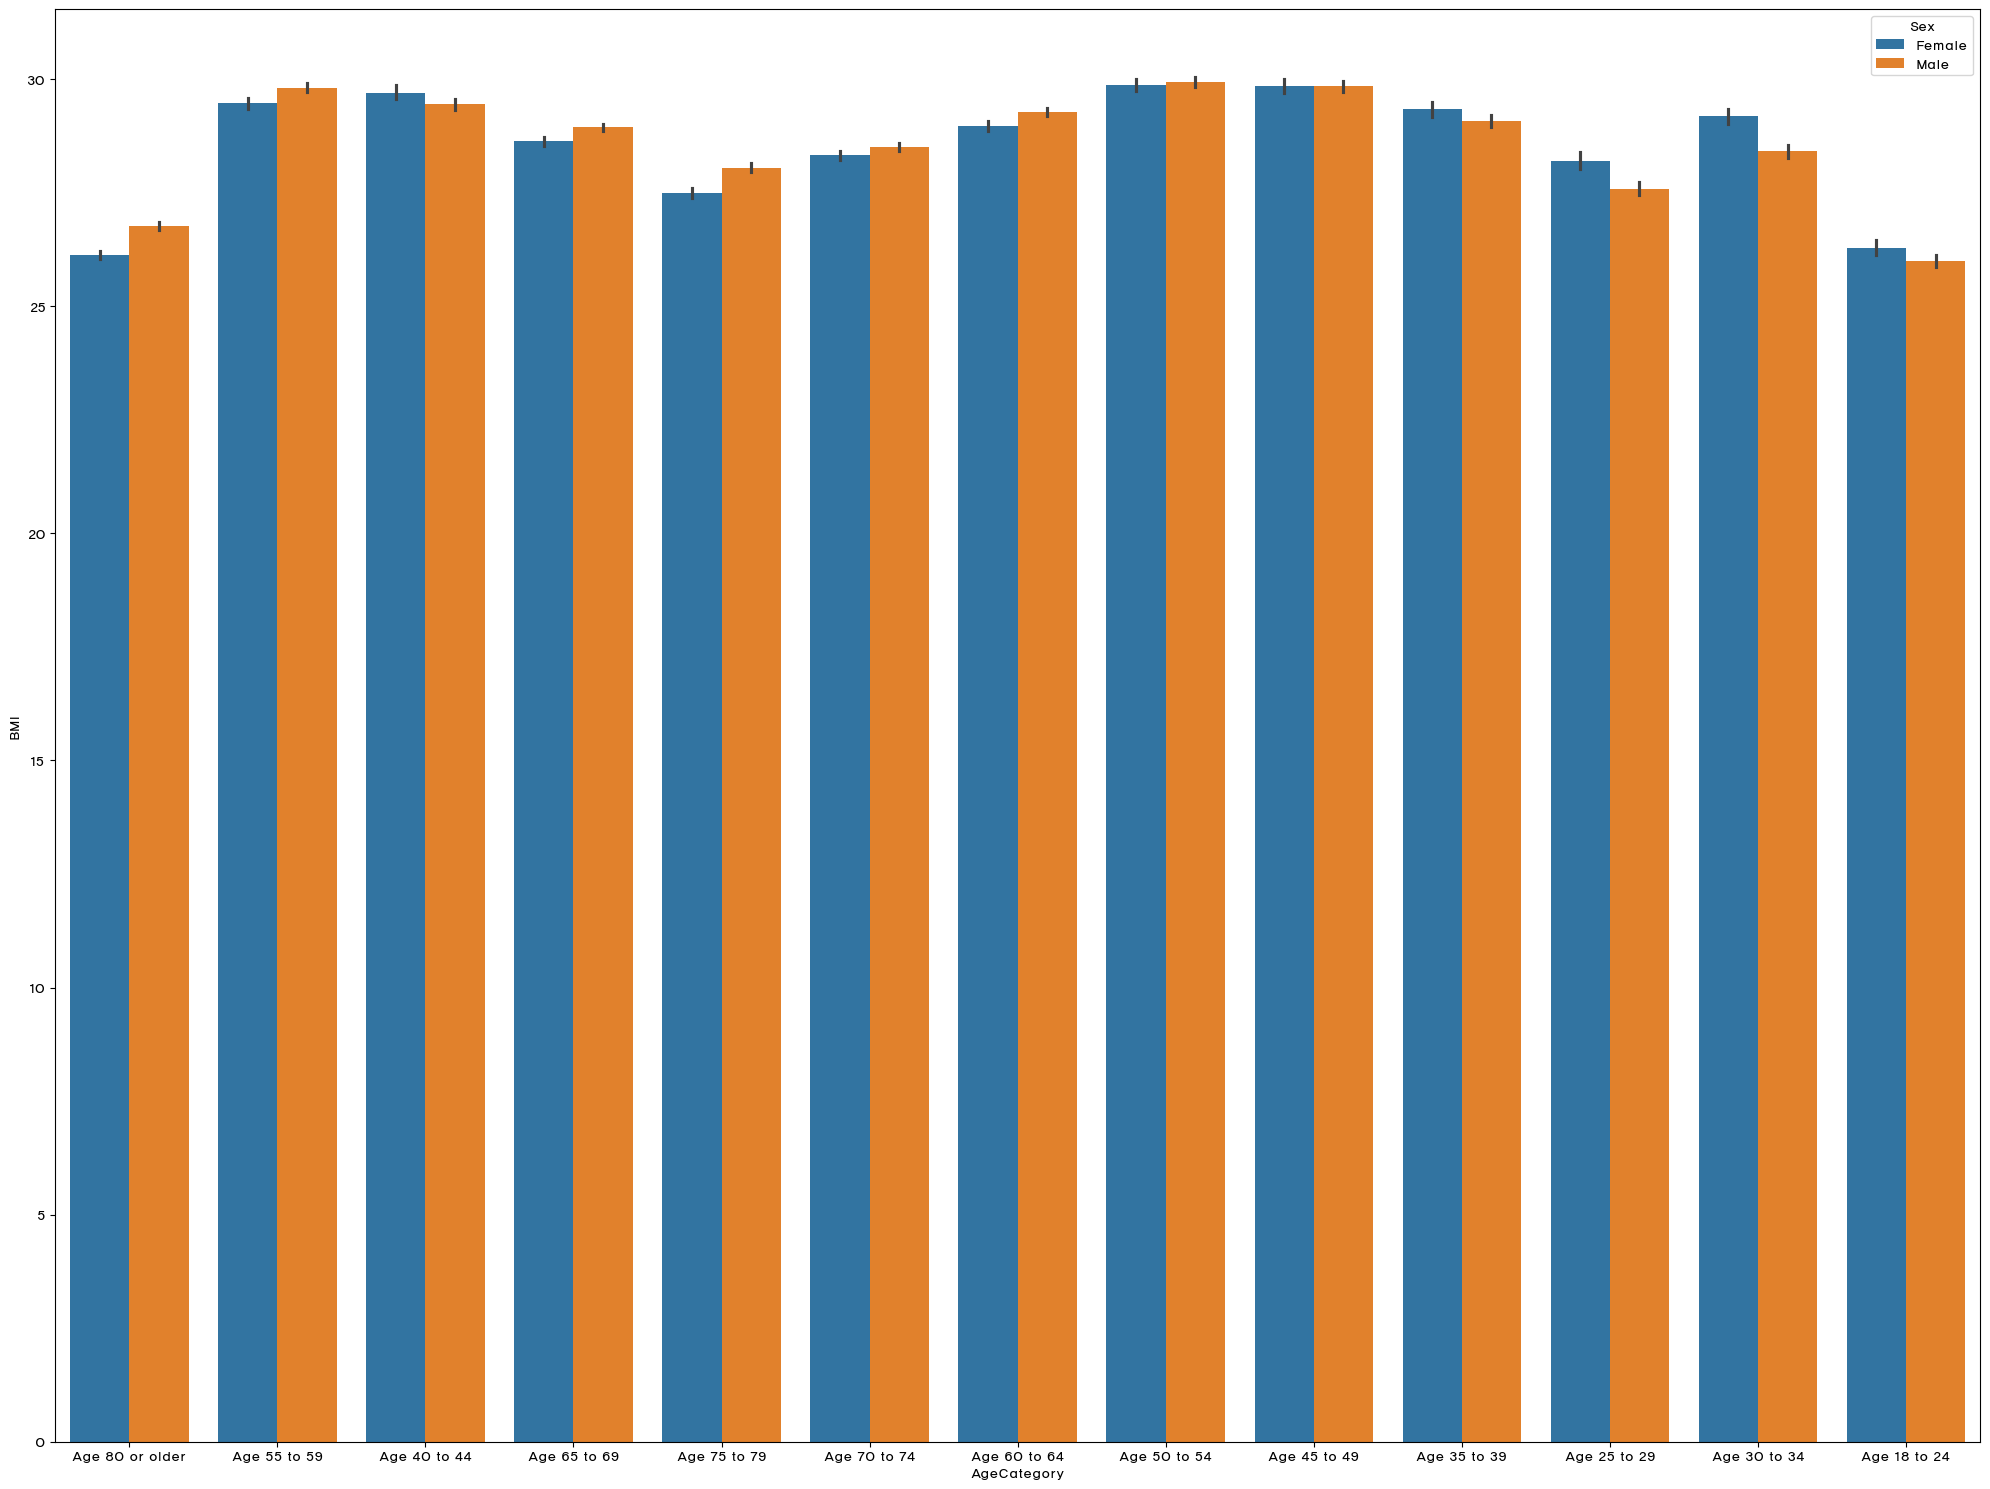

In [44]:
plt.figure(
    figsize=(20,15), # 캔버스 크기 (가로 8 세로 6) 단위 : 인치
)
sns.barplot(
    data=df,
    x='AgeCategory', 
    y='BMI',
    hue='Sex',
)

plt.tight_layout()
plt.show()

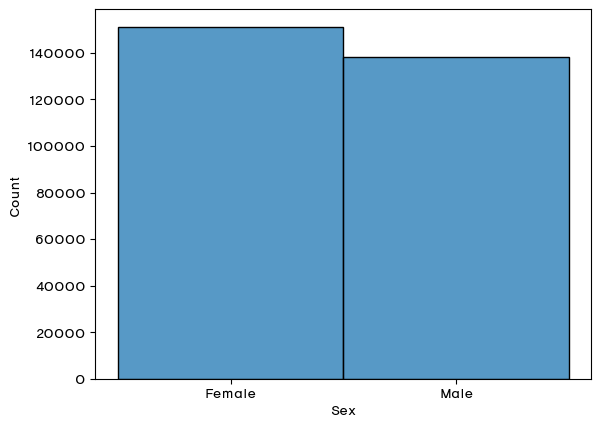

In [46]:
sns.histplot(
    df['Sex']
)

plt.show()

In [47]:
corr_mat = df.corr(
    numeric_only=True
)

corr_mat

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
PhysicalHealthDays,1.000000,0.311973,-0.056473,-0.050922,0.075736,0.115750
MentalHealthDays,0.311973,1.000000,-0.129970,-0.054987,0.042185,0.081283
SleepHours,-0.056473,-0.129970,1.000000,-0.011312,-0.054115,-0.054282
HeightInMeters,-0.050922,-0.054987,-0.011312,1.000000,0.473567,-0.026827
WeightInKilograms,0.075736,0.042185,-0.054115,0.473567,1.000000,0.859379
BMI,0.115750,0.081283,-0.054282,-0.026827,0.859379,1.000000


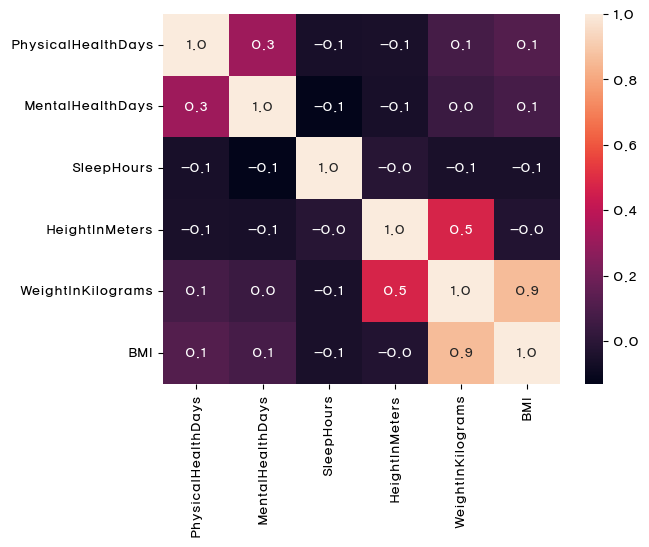

In [48]:
sns.heatmap(
    corr_mat,
    annot=True,
    fmt='.1f'
)

plt.show()

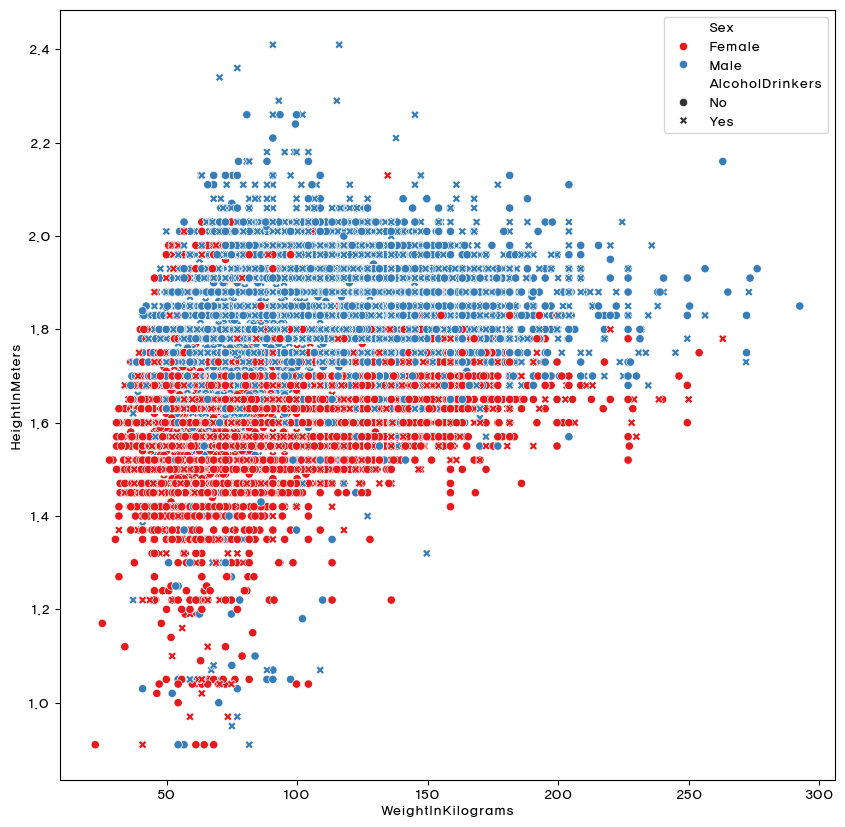

In [57]:
plt.figure(
    figsize=(10,10), # 캔버스 크기 (가로 8 세로 6) 단위 : 인치
)

sns.scatterplot(
    data=df,
    x='WeightInKilograms',
    y='HeightInMeters',
    hue='Sex',
    palette='Set1',
    style='AlcoholDrinkers', 
)

plt.show()

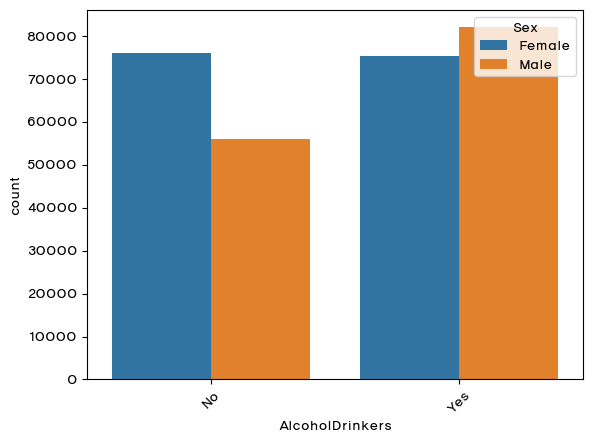

In [63]:
# countplot() : 데이터 개수를 bar로 시각화 하는 그래프

# palette : 막대 색상을 지정하는 색상 팔레트
# hue : 막대를 Pclass 값별로 색상 구분

sns.countplot(
    data=df,
    x='AlcoholDrinkers',
    palette='tab10',
    hue='Sex',
)
plt.xticks(rotation=45)

plt.show()

([0, 1, 2, 3],
 [Text(0, 0, 'Never smoked'),
  Text(1, 0, 'Former smoker'),
  Text(2, 0, 'Current smoker - now smokes some days'),
  Text(3, 0, 'Current smoker - now smokes every day')])

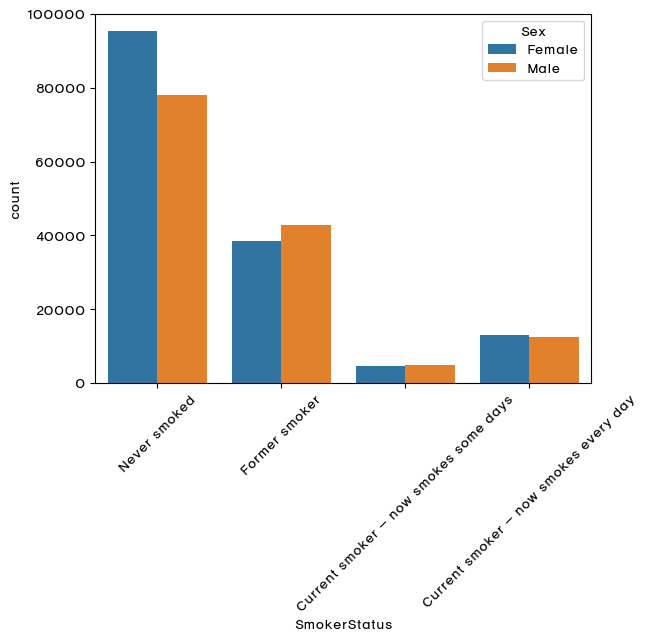

In [6]:
sns.countplot(
    data=df,
    x='SmokerStatus',
    palette='tab10',
    hue='Sex',
)
plt.xticks(rotation=45)

([0, 1, 2, 3],
 [Text(0, 0, 'Never used e-cigarettes in my entire life'),
  Text(1, 0, 'Not at all (right now)'),
  Text(2, 0, 'Use them every day'),
  Text(3, 0, 'Use them some days')])

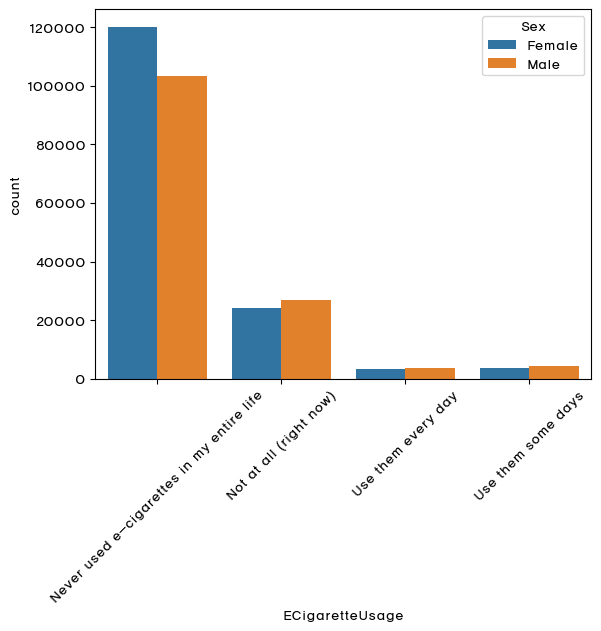

In [7]:
sns.countplot(
    data=df,
    x='ECigaretteUsage',
    palette='tab10',
    hue='Sex',
)
plt.xticks(rotation=45)

([0, 1, 2, 3],
 [Text(0, 0, 'No'),
  Text(1, 0, 'Yes'),
  Text(2, 0, 'No, pre-diabetes or borderline diabetes'),
  Text(3, 0, 'Yes, but only during pregnancy (female)')])

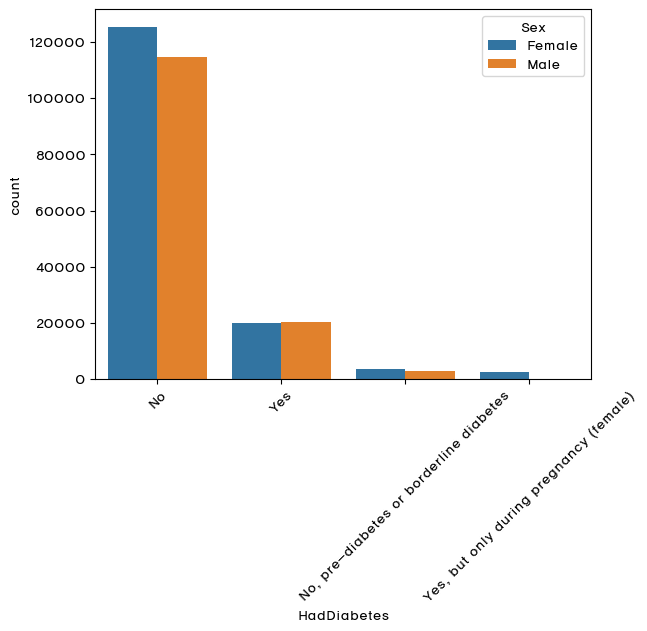

In [8]:
sns.countplot(
    data=df,
    x='HadDiabetes',
    palette='tab10',
    hue='Sex',
)
plt.xticks(rotation=45)

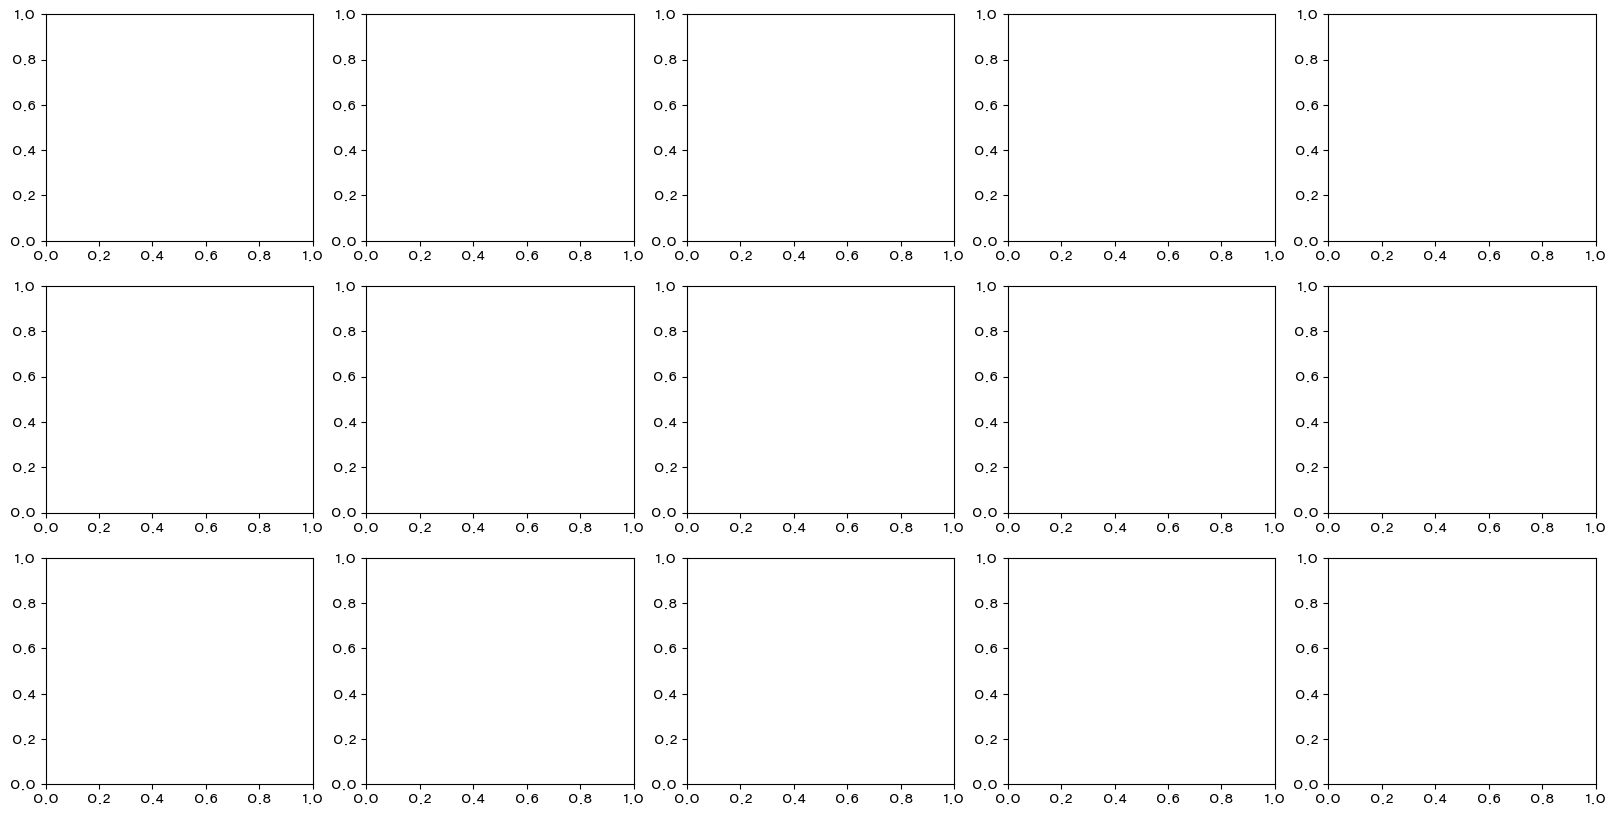

In [12]:
fig, ax = plt.subplots(
    nrows=3,
    ncols=5,
    figsize=(20,10)
)


plt.show()